# Your first deep neural network

# imports

In [39]:
import os
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 
from keras.utils import plot_model, to_categorical

from keras.datasets import cifar10

# data

In [10]:
NUM_CLASSES = 10

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [14]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


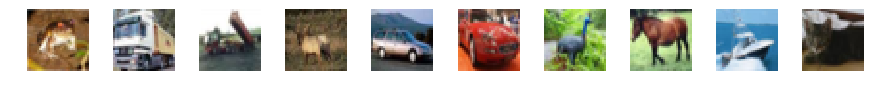

In [52]:
n_to_show = 10

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = x_train[i]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.imshow(img)


# train

In [22]:
INPUT_DIM = (32,32, 3)
DENSE_LAYERS = (50,50)


In [46]:
input_layer = Input(INPUT_DIM, name='input_layer')

x = Flatten()(input_layer)

x = Dense(DENSE_LAYERS[0], activation = 'relu')(x)
x = Dense(DENSE_LAYERS[1], activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                153650    
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
Total params: 156,710
Trainable params: 156,710
Non-trainable params: 0
_________________________________________________________________


In [48]:
opt = Adam(lr=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [49]:
BATCH_SZIE = 32
EPOCHS = 5


In [51]:
model.fit(x_train
          , y_train
          , batch_size=BATCH_SZIE
          , epochs=EPOCHS
          , validation_data=(x_test, y_test)
          , shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 94us/step - loss: 1.6302 - acc: 0.4219 - val_loss: 1.6278 - val_acc: 0.4222
Epoch 2/5
50000/50000 [==============================] - 5s 93us/step - loss: 1.6137 - acc: 0.4268 - val_loss: 1.6282 - val_acc: 0.4227
Epoch 3/5
50000/50000 [==============================] - 5s 93us/step - loss: 1.5975 - acc: 0.4317 - val_loss: 1.5877 - val_acc: 0.4373
Epoch 4/5
50000/50000 [==============================] - 5s 93us/step - loss: 1.5817 - acc: 0.4380 - val_loss: 1.6141 - val_acc: 0.4270
Epoch 5/5
50000/50000 [==============================] - 5s 97us/step - loss: 1.5728 - acc: 0.4397 - val_loss: 1.5795 - val_acc: 0.4380
